# Regression with Neural Networks using Tensorflow

To simplify things, regression problem are used to predict a numerical variable based on some other combination of variables (predicting a number)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


## Create, view and fit data

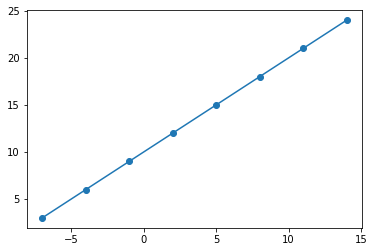

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize data

plt.plot(X,y)# this will draw a line
plt.scatter(X,y) # this will draw points in the same plot as before

## Input and Output shapes

In [3]:
#create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: id=0, shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: id=1, shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
print("number of dimension of house_info : ", house_info.ndim)
print("shape of house_info : ", house_info.shape)
print("size of house_info : ", tf.size(house_info))

number of dimension of house_info :  1
shape of house_info :  (3,)
size of house_info :  tf.Tensor(3, shape=(), dtype=int32)


In [5]:
# Turn our NumPy arrays into tensors with dtype float32
# To do that you must use the tf.cast(x,dtype=)
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: id=4, shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: id=6, shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

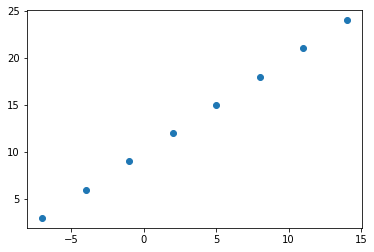

In [6]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

* 1- **Create a model** define the input, the output layers, and the hidden layers of the model
* 2- **Compiling a model** define the loss function (= the function which tells the model how wrong it is) and the optimizer (= the function that tells the model how to improve the patterns its learning) and the evaluation metrics(=we can use it to interpret the performance of the model)
* 3- **Fitting a model** let the model find patterns btw X and y (features and labels)

In [7]:
# set a random seed
tf.random.set_seed(42)

# Create a model using the seaquential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])# output arrays of shape (*,1)

# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X,y, epochs=5)

Train on 8 samples
Epoch 1/5
8/8 [==============================] - 1s 74ms/sample - loss: 11.5048 - mae: 11.5048
Epoch 2/5
8/8 [==============================] - 0s 125us/sample - loss: 11.3723 - mae: 11.3723
Epoch 3/5
8/8 [==============================] - 0s 128us/sample - loss: 11.2398 - mae: 11.2398
Epoch 4/5
8/8 [==============================] - 0s 249us/sample - loss: 11.1073 - mae: 11.1073
Epoch 5/5
8/8 [==============================] - 0s 249us/sample - loss: 10.9748 - mae: 10.9748


* The Keras sequential class helps to form a cluster of a layer that is linearly stacked into tf. keras. Model
* Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
* mae is short for mean absolute error
* sgd is short for stochasitc gradient descent


In [8]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create the model.

* 1- **creating a model** we might add mode layers, increase the number of hidden units(neurons) withing each of the hidden layers, change the activation function of each layer

* 2- **compiling a model** we might change the optimization function or perhaps the learning rate of the optimization function

* 3- **Fitting a model** we might fit a model for more epochs (train for longer) or use more data(more example to learn)

In [9]:
# let's rebuild our model

# create the model
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

#fit the model
model.fit(X,y,epochs=100)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 0s 29ms/sample - loss: 11.2219 - mae: 11.2219
Epoch 2/100
8/8 [==============================] - 0s 246us/sample - loss: 11.0894 - mae: 11.0894
Epoch 3/100
8/8 [==============================] - 0s 250us/sample - loss: 10.9569 - mae: 10.9569
Epoch 4/100
8/8 [==============================] - 0s 127us/sample - loss: 10.8244 - mae: 10.8244
Epoch 5/100
8/8 [==============================] - 0s 125us/sample - loss: 10.6919 - mae: 10.6919
Epoch 6/100
8/8 [==============================] - 0s 245us/sample - loss: 10.5594 - mae: 10.5594
Epoch 7/100
8/8 [==============================] - 0s 374us/sample - loss: 10.4269 - mae: 10.4269
Epoch 8/100
8/8 [==============================] - 0s 245us/sample - loss: 10.2944 - mae: 10.2944
Epoch 9/100
8/8 [==============================] - 0s 129us/sample - loss: 10.1619 - mae: 10.1619
Epoch 10/100
8/8 [==============================] - 0s 245us/sample - loss: 10.0294 - mae: 10.0294
E

Epoch 86/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9656 - mae: 6.9656
Epoch 87/100
8/8 [==============================] - 0s 125us/sample - loss: 6.9600 - mae: 6.9600
Epoch 88/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9544 - mae: 6.9544
Epoch 89/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9488 - mae: 6.9488
Epoch 90/100
8/8 [==============================] - 0s 246us/sample - loss: 6.9431 - mae: 6.9431
Epoch 91/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9375 - mae: 6.9375
Epoch 92/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9319 - mae: 6.9319
Epoch 93/100
8/8 [==============================] - 0s 246us/sample - loss: 6.9263 - mae: 6.9263
Epoch 94/100
8/8 [==============================] - 0s 246us/sample - loss: 6.9206 - mae: 6.9206
Epoch 95/100
8/8 [==============================] - 0s 125us/sample - loss: 6.9150 - mae: 6.9150
Epoch 96/100
8/8 [============

In [10]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [11]:
# let's improve the model another time

# create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(50),tf.keras.layers.Dense(1)])

# compile the model (we modify the optimizer function with Adam optimizer with a lr 0.01)
model.compile(loss=tf.keras.losses.mae, optimizer=tf.optimizers.Adam(lr=0.01),metrics=["mae"])

# fit the model
model.fit(X,y, epochs=100)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 0s 49ms/sample - loss: 11.7682 - mae: 11.7682
Epoch 2/100
8/8 [==============================] - 0s 249us/sample - loss: 11.0963 - mae: 11.0963
Epoch 3/100
8/8 [==============================] - 0s 249us/sample - loss: 10.4150 - mae: 10.4150
Epoch 4/100
8/8 [==============================] - 0s 125us/sample - loss: 9.7212 - mae: 9.7212
Epoch 5/100
8/8 [==============================] - 0s 249us/sample - loss: 9.0104 - mae: 9.0104
Epoch 6/100
8/8 [==============================] - 0s 249us/sample - loss: 8.2778 - mae: 8.2778
Epoch 7/100
8/8 [==============================] - 0s 129us/sample - loss: 7.5198 - mae: 7.5198
Epoch 8/100
8/8 [==============================] - 0s 249us/sample - loss: 6.9648 - mae: 6.9648
Epoch 9/100
8/8 [==============================] - 0s 125us/sample - loss: 7.0672 - mae: 7.0672
Epoch 10/100
8/8 [==============================] - 0s 246us/sample - loss: 7.3315 - mae: 7.3315
Epoch 11/100
8/

Epoch 86/100
8/8 [==============================] - 0s 245us/sample - loss: 0.2124 - mae: 0.2124
Epoch 87/100
8/8 [==============================] - 0s 249us/sample - loss: 0.2288 - mae: 0.2288
Epoch 88/100
8/8 [==============================] - 0s 246us/sample - loss: 0.1901 - mae: 0.1901
Epoch 89/100
8/8 [==============================] - 0s 120us/sample - loss: 0.1354 - mae: 0.1354
Epoch 90/100
8/8 [==============================] - 0s 247us/sample - loss: 0.1218 - mae: 0.1218
Epoch 91/100
8/8 [==============================] - 0s 248us/sample - loss: 0.0382 - mae: 0.0382
Epoch 92/100
8/8 [==============================] - 0s 120us/sample - loss: 0.2197 - mae: 0.2197
Epoch 93/100
8/8 [==============================] - 0s 125us/sample - loss: 0.2189 - mae: 0.2189
Epoch 94/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1427 - mae: 0.1427
Epoch 95/100
8/8 [==============================] - 0s 249us/sample - loss: 0.1168 - mae: 0.1168
Epoch 96/100
8/8 [============

In [12]:
model.predict([17.0])

array([[26.583532]], dtype=float32)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  100       
_________________________________________________________________
dense_3 (Dense)              multiple                  51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
# #C:\Program Files\Graphviz
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# #plot_model(model, show_shapes=True, show_layer_names=True)

Using TensorFlow backend.


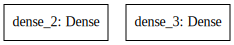

In [15]:
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# Image('model.png')

## Evaluting a model
In practice, a typical workflow you'll go through when building neural networks is:

> Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

When it comes to evaluation... there are 3 words you should memorize:
> Visualize, visualize, visualize

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [16]:
# Make a big dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: id=2866, shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [17]:
# Label for our dataset
y = X + 10
y

<tf.Tensor: id=2868, shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

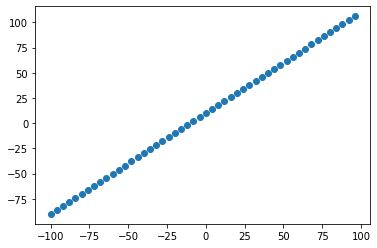

In [18]:
# Visualize the data
plt.scatter(X,y)

## The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [19]:
# check the length of data
len(X)

50

In [20]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

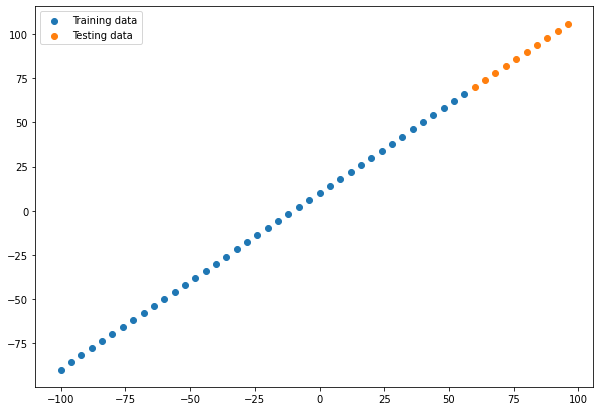

In [21]:
# visualize training data and testing data
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, label="Training data")
plt.scatter(X_test, y_test, label="Testing data")
plt.legend()


In [22]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),#.SGD()
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [24]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

In [26]:
model.fit(X_train,y_train,epochs=200, )#verbose=0 to not display the output

Train on 40 samples
Epoch 1/200
40/40 [==============================] - 0s 6ms/sample - loss: 27.8137 - mae: 27.8137
Epoch 2/200
40/40 [==============================] - 0s 75us/sample - loss: 25.8345 - mae: 25.8345
Epoch 3/200
40/40 [==============================] - 0s 75us/sample - loss: 20.4511 - mae: 20.4511
Epoch 4/200
40/40 [==============================] - 0s 75us/sample - loss: 13.3376 - mae: 13.3376
Epoch 5/200
40/40 [==============================] - 0s 99us/sample - loss: 18.2829 - mae: 18.2829
Epoch 6/200
40/40 [==============================] - 0s 74us/sample - loss: 18.1217 - mae: 18.1217
Epoch 7/200
40/40 [==============================] - 0s 100us/sample - loss: 12.7809 - mae: 12.7809
Epoch 8/200
40/40 [==============================] - 0s 99us/sample - loss: 12.1511 - mae: 12.1511
Epoch 9/200
40/40 [==============================] - 0s 100us/sample - loss: 11.1948 - mae: 11.1948
Epoch 10/200
40/40 [==============================] - 0s 100us/sample - loss: 10.5904 - 

40/40 [==============================] - 0s 100us/sample - loss: 11.3908 - mae: 11.3908
Epoch 83/200
40/40 [==============================] - 0s 100us/sample - loss: 17.1825 - mae: 17.1825
Epoch 84/200
40/40 [==============================] - 0s 100us/sample - loss: 10.3409 - mae: 10.3409
Epoch 85/200
40/40 [==============================] - 0s 75us/sample - loss: 21.6712 - mae: 21.6712
Epoch 86/200
40/40 [==============================] - 0s 100us/sample - loss: 11.9182 - mae: 11.9182
Epoch 87/200
40/40 [==============================] - 0s 75us/sample - loss: 8.8366 - mae: 8.8366
Epoch 88/200
40/40 [==============================] - 0s 75us/sample - loss: 9.9050 - mae: 9.9050
Epoch 89/200
40/40 [==============================] - 0s 75us/sample - loss: 19.0907 - mae: 19.0907
Epoch 90/200
40/40 [==============================] - 0s 75us/sample - loss: 19.6125 - mae: 19.6125
Epoch 91/200
40/40 [==============================] - 0s 75us/sample - loss: 10.2435 - mae: 10.2435
Epoch 92/200


40/40 [==============================] - 0s 74us/sample - loss: 33.1449 - mae: 33.1449
Epoch 164/200
40/40 [==============================] - 0s 75us/sample - loss: 25.0927 - mae: 25.0927
Epoch 165/200
40/40 [==============================] - 0s 100us/sample - loss: 10.6626 - mae: 10.6626
Epoch 166/200
40/40 [==============================] - 0s 74us/sample - loss: 13.9357 - mae: 13.9357
Epoch 167/200
40/40 [==============================] - 0s 75us/sample - loss: 19.5668 - mae: 19.5668
Epoch 168/200
40/40 [==============================] - 0s 75us/sample - loss: 13.3174 - mae: 13.3174
Epoch 169/200
40/40 [==============================] - 0s 100us/sample - loss: 17.9487 - mae: 17.9487
Epoch 170/200
40/40 [==============================] - 0s 75us/sample - loss: 18.1582 - mae: 18.1582
Epoch 171/200
40/40 [==============================] - 0s 74us/sample - loss: 11.6374 - mae: 11.6374
Epoch 172/200
40/40 [==============================] - 0s 75us/sample - loss: 17.2660 - mae: 17.2660
Ep

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


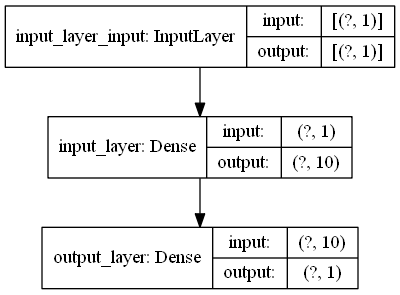

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions¶
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [29]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([[ 64.51161 ],
       [ 68.60118 ],
       [ 72.69074 ],
       [ 76.780304],
       [ 80.86987 ],
       [ 84.959435],
       [ 89.049   ],
       [ 93.13857 ],
       [ 97.22813 ],
       [101.317696]], dtype=float32)

In [30]:
y_test

<tf.Tensor: id=2908, shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [31]:

# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

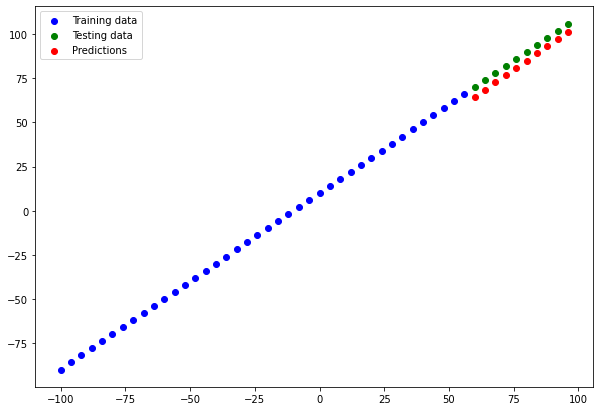

In [32]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [33]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 6ms/sample - loss: 5.0853 - mae: 5.0853


[5.085345268249512, 5.0853453]

In [34]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: id=5354, shape=(10,), dtype=float32, numpy=
array([23.488388, 19.398819, 15.847406, 13.131818, 11.25205 , 10.208113,
       10.      , 10.627714, 12.09125 , 14.390619], dtype=float32)>

In [35]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

**Note** You can notice the important of squeeze below

In [36]:
a = tf.constant(value=[1,3,4,5], shape=(1,4))
a

<tf.Tensor: id=5357, shape=(1, 4), dtype=int32, numpy=array([[1, 3, 4, 5]])>

In [37]:
tf.squeeze(a)

<tf.Tensor: id=5358, shape=(4,), dtype=int32, numpy=array([1, 3, 4, 5])>

## Running experiments to improve our model¶

>Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...

* 1- Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
* 2- Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* 3-Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

* model_1 - same as the original model, 1 layer, trained for 100 epochs
* model_2 - 2 layers, trained for 100 epochs
* model_3 - 2 layers, trained for 500 epochs

**model_1**

In [38]:
X_train, y_train

(<tf.Tensor: id=2896, shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: id=2900, shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [59]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(layers=[tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

model_1.fit(X_train,y_train,epochs=100)

Train on 40 samples
Epoch 1/100
40/40 [==============================] - 0s 5ms/sample - loss: 15.7535 - mae: 15.7535
Epoch 2/100
40/40 [==============================] - 0s 75us/sample - loss: 11.2830 - mae: 11.2830
Epoch 3/100
40/40 [==============================] - 0s 100us/sample - loss: 9.3153 - mae: 9.3153
Epoch 4/100
40/40 [==============================] - 0s 125us/sample - loss: 10.5375 - mae: 10.5375
Epoch 5/100
40/40 [==============================] - 0s 75us/sample - loss: 12.9586 - mae: 12.9586
Epoch 6/100
40/40 [==============================] - 0s 75us/sample - loss: 10.6511 - mae: 10.6511
Epoch 7/100
40/40 [==============================] - 0s 100us/sample - loss: 16.6176 - mae: 16.6176
Epoch 8/100
40/40 [==============================] - 0s 75us/sample - loss: 8.4914 - mae: 8.4914
Epoch 9/100
40/40 [==============================] - 0s 75us/sample - loss: 10.1877 - mae: 10.1877
Epoch 10/100
40/40 [==============================] - 0s 100us/sample - loss: 8.8407 - mae:

40/40 [==============================] - 0s 100us/sample - loss: 8.5710 - mae: 8.5710
Epoch 84/100
40/40 [==============================] - 0s 75us/sample - loss: 8.9407 - mae: 8.9406
Epoch 85/100
40/40 [==============================] - 0s 100us/sample - loss: 9.6096 - mae: 9.6096
Epoch 86/100
40/40 [==============================] - 0s 100us/sample - loss: 7.8301 - mae: 7.8300
Epoch 87/100
40/40 [==============================] - ETA: 0s - loss: 7.7061 - mae: 7.706 - 0s 75us/sample - loss: 8.1016 - mae: 8.1016
Epoch 88/100
40/40 [==============================] - 0s 75us/sample - loss: 8.9290 - mae: 8.9290
Epoch 89/100
40/40 [==============================] - 0s 100us/sample - loss: 10.3717 - mae: 10.3717
Epoch 90/100
40/40 [==============================] - 0s 100us/sample - loss: 10.8113 - mae: 10.8113
Epoch 91/100
40/40 [==============================] - 0s 75us/sample - loss: 14.7285 - mae: 14.7285
Epoch 92/100
40/40 [==============================] - 0s 100us/sample - loss: 9.79

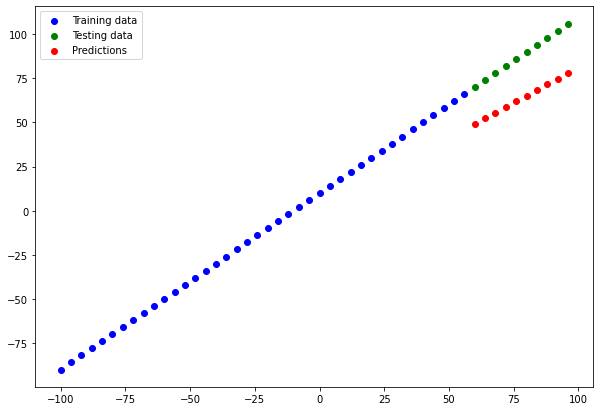

In [60]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [64]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_true=y_test,y_pred=y_preds_1)
mse_1 = mse(y_true=y_test,y_pred=y_preds_1)
mae_1,mse_1

(<tf.Tensor: id=20450, shape=(), dtype=float32, numpy=24.425938>,
 <tf.Tensor: id=20456, shape=(), dtype=float32, numpy=602.03613>)

**model_2**
* 2 dense layers, trained 100 epochs

In [57]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(50), tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Train on 40 samples
Epoch 1/100
40/40 [==============================] - 0s 6ms/sample - loss: 36.8650 - mse: 1855.4773
Epoch 2/100
40/40 [==============================] - 0s 76us/sample - loss: 31.0221 - mse: 1436.3373
Epoch 3/100
40/40 [==============================] - 0s 74us/sample - loss: 14.3776 - mse: 363.7753
Epoch 4/100
40/40 [==============================] - 0s 100us/sample - loss: 19.7911 - mse: 562.4460
Epoch 5/100
40/40 [==============================] - 0s 99us/sample - loss: 13.2711 - mse: 258.7011
Epoch 6/100
40/40 [==============================] - 0s 100us/sample - loss: 17.0998 - mse: 387.2885
Epoch 7/100
40/40 [==============================] - 0s 100us/sample - loss: 18.8897 - mse: 473.3736
Epoch 8/100
40/40 [==============================] - 0s 75us/sample - loss: 10.9019 - mse: 190.5668
Epoch 9/100
40/40 [==============================] - 0s 75us/sample - loss: 10.9933 - mse: 179.7867
Epoch 10/100
40/40 [==============================] - 0s 100us/sample - loss

40/40 [==============================] - 0s 75us/sample - loss: 17.2316 - mse: 439.3746
Epoch 82/100
40/40 [==============================] - 0s 76us/sample - loss: 11.2941 - mse: 159.4926
Epoch 83/100
40/40 [==============================] - 0s 75us/sample - loss: 16.9845 - mse: 454.3665
Epoch 84/100
40/40 [==============================] - 0s 100us/sample - loss: 10.3491 - mse: 180.1811
Epoch 85/100
40/40 [==============================] - 0s 100us/sample - loss: 21.7453 - mse: 672.4960
Epoch 86/100
40/40 [==============================] - 0s 74us/sample - loss: 11.7996 - mse: 200.3048
Epoch 87/100
40/40 [==============================] - 0s 75us/sample - loss: 8.7595 - mse: 97.9818
Epoch 88/100
40/40 [==============================] - 0s 99us/sample - loss: 9.8380 - mse: 113.8439
Epoch 89/100
40/40 [==============================] - 0s 75us/sample - loss: 18.9611 - mse: 504.1966
Epoch 90/100
40/40 [==============================] - 0s 99us/sample - loss: 19.4691 - mse: 534.7188
Epoc

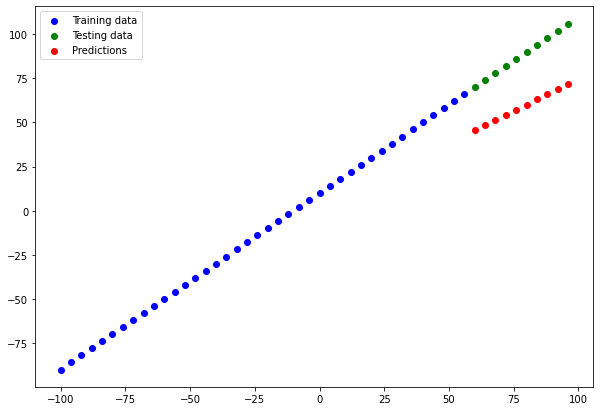

In [58]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [63]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: id=20437, shape=(), dtype=float32, numpy=29.35293>,
 <tf.Tensor: id=20443, shape=(), dtype=float32, numpy=871.1322>)

**model_3**
* 2 layers, trained for 500 epochs

In [55]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(50),# try with 50 noeuds
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Train on 40 samples
Epoch 1/500
40/40 [==============================] - 0s 6ms/sample - loss: 36.8650 - mae: 36.8650
Epoch 2/500
40/40 [==============================] - 0s 100us/sample - loss: 31.0221 - mae: 31.0221
Epoch 3/500
40/40 [==============================] - 0s 100us/sample - loss: 14.3776 - mae: 14.3776
Epoch 4/500
40/40 [==============================] - 0s 100us/sample - loss: 19.7911 - mae: 19.7911
Epoch 5/500
40/40 [==============================] - 0s 75us/sample - loss: 13.2711 - mae: 13.2711
Epoch 6/500
40/40 [==============================] - 0s 100us/sample - loss: 17.0998 - mae: 17.0998
Epoch 7/500
40/40 [==============================] - 0s 125us/sample - loss: 18.8897 - mae: 18.8897
Epoch 8/500
40/40 [==============================] - 0s 100us/sample - loss: 10.9019 - mae: 10.9019
Epoch 9/500
40/40 [==============================] - 0s 100us/sample - loss: 10.9933 - mae: 10.9933
Epoch 10/500
40/40 [==============================] - 0s 75us/sample - loss: 17.205

40/40 [==============================] - 0s 125us/sample - loss: 11.2941 - mae: 11.2941
Epoch 83/500
40/40 [==============================] - 0s 150us/sample - loss: 16.9845 - mae: 16.9845
Epoch 84/500
40/40 [==============================] - 0s 100us/sample - loss: 10.3491 - mae: 10.3491
Epoch 85/500
40/40 [==============================] - 0s 125us/sample - loss: 21.7453 - mae: 21.7453
Epoch 86/500
40/40 [==============================] - 0s 75us/sample - loss: 11.7996 - mae: 11.7996
Epoch 87/500
40/40 [==============================] - 0s 75us/sample - loss: 8.7595 - mae: 8.7595
Epoch 88/500
40/40 [==============================] - 0s 75us/sample - loss: 9.8380 - mae: 9.8380
Epoch 89/500
40/40 [==============================] - 0s 75us/sample - loss: 18.9611 - mae: 18.9611
Epoch 90/500
40/40 [==============================] - 0s 75us/sample - loss: 19.4691 - mae: 19.4691
Epoch 91/500
40/40 [==============================] - 0s 75us/sample - loss: 10.1702 - mae: 10.1702
Epoch 92/500


40/40 [==============================] - 0s 100us/sample - loss: 13.3510 - mae: 13.3510
Epoch 163/500
40/40 [==============================] - 0s 100us/sample - loss: 19.9568 - mae: 19.9568
Epoch 164/500
40/40 [==============================] - 0s 75us/sample - loss: 14.6821 - mae: 14.6821
Epoch 165/500
40/40 [==============================] - 0s 100us/sample - loss: 11.5257 - mae: 11.5257
Epoch 166/500
40/40 [==============================] - 0s 75us/sample - loss: 13.9317 - mae: 13.9317
Epoch 167/500
40/40 [==============================] - 0s 100us/sample - loss: 19.5719 - mae: 19.5719
Epoch 168/500
40/40 [==============================] - 0s 100us/sample - loss: 13.3027 - mae: 13.3027
Epoch 169/500
40/40 [==============================] - 0s 99us/sample - loss: 17.9361 - mae: 17.9361
Epoch 170/500
40/40 [==============================] - 0s 75us/sample - loss: 18.1412 - mae: 18.1412
Epoch 171/500
40/40 [==============================] - 0s 125us/sample - loss: 11.6062 - mae: 11.606

40/40 [==============================] - 0s 100us/sample - loss: 6.8729 - mae: 6.8729
Epoch 244/500
40/40 [==============================] - 0s 75us/sample - loss: 15.2784 - mae: 15.2784
Epoch 245/500
40/40 [==============================] - 0s 75us/sample - loss: 7.6407 - mae: 7.6407
Epoch 246/500
40/40 [==============================] - 0s 100us/sample - loss: 27.2633 - mae: 27.2633
Epoch 247/500
40/40 [==============================] - 0s 100us/sample - loss: 10.0605 - mae: 10.0605
Epoch 248/500
40/40 [==============================] - 0s 88us/sample - loss: 5.9295 - mae: 5.9295
Epoch 249/500
40/40 [==============================] - 0s 100us/sample - loss: 19.5992 - mae: 19.5992
Epoch 250/500
40/40 [==============================] - 0s 75us/sample - loss: 11.9411 - mae: 11.9411
Epoch 251/500
40/40 [==============================] - 0s 75us/sample - loss: 22.8430 - mae: 22.8430
Epoch 252/500
40/40 [==============================] - 0s 75us/sample - loss: 24.3321 - mae: 24.3321
Epoch 

40/40 [==============================] - 0s 100us/sample - loss: 19.3100 - mae: 19.3100
Epoch 325/500
40/40 [==============================] - 0s 100us/sample - loss: 17.4784 - mae: 17.4784
Epoch 326/500
40/40 [==============================] - 0s 100us/sample - loss: 12.9517 - mae: 12.9517
Epoch 327/500
40/40 [==============================] - 0s 100us/sample - loss: 12.9401 - mae: 12.9401
Epoch 328/500
40/40 [==============================] - 0s 100us/sample - loss: 6.7602 - mae: 6.7602
Epoch 329/500
40/40 [==============================] - 0s 75us/sample - loss: 13.9925 - mae: 13.9925
Epoch 330/500
40/40 [==============================] - 0s 75us/sample - loss: 13.0770 - mae: 13.0770
Epoch 331/500
40/40 [==============================] - 0s 75us/sample - loss: 23.8492 - mae: 23.8492
Epoch 332/500
40/40 [==============================] - 0s 100us/sample - loss: 16.1314 - mae: 16.1314
Epoch 333/500
40/40 [==============================] - 0s 100us/sample - loss: 12.7001 - mae: 12.7001

40/40 [==============================] - 0s 75us/sample - loss: 14.6590 - mae: 14.6590
Epoch 406/500
40/40 [==============================] - 0s 100us/sample - loss: 13.2842 - mae: 13.2842
Epoch 407/500
40/40 [==============================] - 0s 100us/sample - loss: 13.6218 - mae: 13.6218
Epoch 408/500
40/40 [==============================] - 0s 75us/sample - loss: 33.2589 - mae: 33.2589
Epoch 409/500
40/40 [==============================] - 0s 100us/sample - loss: 14.0832 - mae: 14.0832
Epoch 410/500
40/40 [==============================] - 0s 100us/sample - loss: 19.6421 - mae: 19.6421
Epoch 411/500
40/40 [==============================] - 0s 75us/sample - loss: 19.4375 - mae: 19.4375
Epoch 412/500
40/40 [==============================] - 0s 75us/sample - loss: 27.7576 - mae: 27.7576
Epoch 413/500
40/40 [==============================] - 0s 75us/sample - loss: 25.5791 - mae: 25.5791
Epoch 414/500
40/40 [==============================] - 0s 75us/sample - loss: 11.7607 - mae: 11.7607


40/40 [==============================] - 0s 100us/sample - loss: 20.4176 - mae: 20.4176
Epoch 487/500
40/40 [==============================] - 0s 75us/sample - loss: 25.4900 - mae: 25.4900
Epoch 488/500
40/40 [==============================] - 0s 100us/sample - loss: 21.7881 - mae: 21.7881
Epoch 489/500
40/40 [==============================] - 0s 100us/sample - loss: 8.4547 - mae: 8.4547
Epoch 490/500
40/40 [==============================] - 0s 75us/sample - loss: 9.1511 - mae: 9.1511
Epoch 491/500
40/40 [==============================] - 0s 75us/sample - loss: 16.7396 - mae: 16.7396
Epoch 492/500
40/40 [==============================] - 0s 100us/sample - loss: 7.4489 - mae: 7.4489
Epoch 493/500
40/40 [==============================] - 0s 100us/sample - loss: 18.3494 - mae: 18.3494
Epoch 494/500
40/40 [==============================] - 0s 75us/sample - loss: 9.5644 - mae: 9.5644
Epoch 495/500
40/40 [==============================] - 0s 100us/sample - loss: 15.1726 - mae: 15.1726
Epoch 

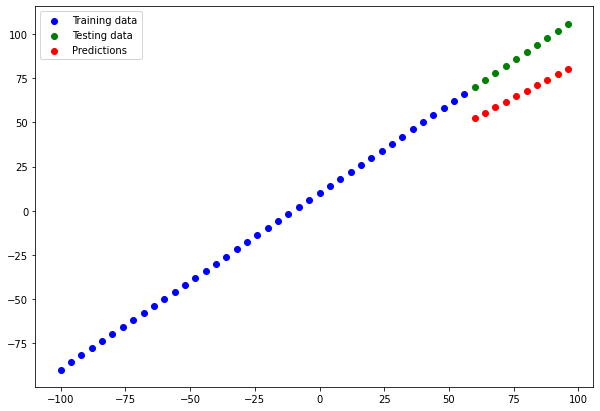

In [56]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: id=20424, shape=(), dtype=float32, numpy=21.59036>,
 <tf.Tensor: id=20430, shape=(), dtype=float32, numpy=472.66177>)

In [62]:
mae_3.numpy()

21.59036

## Compating the results

In [65]:
import pandas as pd
cmp = pd.DataFrame([['model_1',mae_1.numpy(),mse_1.numpy()],['model_2',mae_2.numpy(),mse_2.numpy()],['model_3',mae_3.numpy(),mse_3.numpy()]],columns=['model','mae','mse'])
cmp.set_index('model')

,mae,mse
model,,
model_1,24.425938,602.036133
model_2,29.352930,871.132202
model_3,21.590361,472.661774


model_3 perfoms well

In [66]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  100       
_________________________________________________________________
dense_11 (Dense)             multiple                  51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


> 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 Resource: As you build more models, you'll want to look into using:

* TensorBoard (https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases (https://wandb.ai/site) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models¶
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

* The SavedModel format
* The HDF5 format

In [69]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [70]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [71]:
loaded_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  100       
_________________________________________________________________
dense_13 (Dense)             multiple                  51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compare model_2 predictions with SavedModel format model predictions
m2predict = model_2.predict(X_test)
smpredict = loaded_model.predict(X_test)

m2predict == smpredict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
smmae = mae(y_test, smpredict)

smmae == mae_2

<tf.Tensor: id=22310, shape=(), dtype=bool, numpy=True>

## Work in a large dataset

In [75]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
# Let's try one-hot encode our DataFrame so it's all numbers
df_one_hot_encoder = pd.get_dummies(df)
df_one_hot_encoder.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [91]:
# Create X & y values (features and labels)
X = df_one_hot_encoder.drop('charges',axis=1)
y = df_one_hot_encoder['charges']

In [92]:
X.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [93]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X),len(X_train), len(X_test)

(1338, 1070, 268)

In [94]:
X_train.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [96]:
# Build a ml model
tf.random.set_seed(42)
df_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

df_model.compile(loss = tf.keras.losses.mae, 
                 optimizer = tf.keras.optimizers.SGD(), 
                 metrics = ["mae"])



In [97]:
df_model.fit(X_train, y_train, epochs = 100)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: inputs=      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
560    46  19.950         2           1         0          1           0   
1285   47  24.320         0           1         0          1           0   
1142   52  24.860         0           1         0          1           0   
969    39  34.320         5           1         0          1           0   
486    54  21.470         3           1         0          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1095   18  31.350         4           1         0          1           0   
1130   39  23.870         5           1         0          1           0   
1294   58  25.175         0           0         1          1           0   
860    37  47.600         2           1         0          0           1   
1126   55  29.900         0           0         1          1           0   

      region_northeast  region_northwest  region_southeast  region_southwest  
560                  0                 1                 0                 0  
1285                 1                 0                 0                 0  
1142                 0                 0                 1                 0  
969                  0                 0                 1                 0  
486                  0                 1                 0                 0  
...                ...               ...               ...               ...  
1095                 1                 0                 0                 0  
1130                 0                 0                 1                 0  
1294                 1                 0                 0                 0  
860                  0                 0                 0                 1  
1126                 0                 0                 0                 1  

[1070 rows x 11 columns]

In [98]:
df_model.evaluate(X_test,y_test)


ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: inputs=      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
764    45  25.175         2           1         0          1           0   
887    36  30.020         0           1         0          1           0   
890    64  26.885         0           1         0          0           1   
1293   46  25.745         3           0         1          1           0   
259    19  31.920         0           0         1          0           1   
...   ...     ...       ...         ...       ...        ...         ...   
109    63  35.090         0           0         1          0           1   
575    58  27.170         0           1         0          1           0   
535    38  28.025         1           0         1          1           0   
543    54  47.410         0           1         0          0           1   
846    51  34.200         1           1         0          1           0   

      region_northeast  region_northwest  region_southeast  region_southwest  
764                  1                 0                 0                 0  
887                  0                 1                 0                 0  
890                  0                 1                 0                 0  
1293                 0                 1                 0                 0  
259                  0                 1                 0                 0  
...                ...               ...               ...               ...  
109                  0                 0                 1                 0  
575                  0                 1                 0                 0  
535                  1                 0                 0                 0  
543                  0                 0                 1                 0  
846                  0                 0                 0                 1  

[268 rows x 11 columns]

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

* Add an extra layer with more hidden units and use the Adam optimizer
* Same as above but train for longer (200 epochs)
* (insert your own experiment here)


>🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.